In [1]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import time
%matplotlib inline
import h5py
import os

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Convolution2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras import backend as K

import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import numpy as np

from sklearn.metrics import confusion_matrix
from keras.utils.vis_utils import model_to_dot

import tensorflow as tf
tf.set_random_seed(1)

/Users/julia/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def create_datagens(img_width, img_height, batch_size, train_dir, valid_dir):
    # Data Generators
    train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

    valid_datagen = ImageDataGenerator(
        rescale=1. / 255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_width, img_height),
        batch_size = batch_size)

    valid_generator = valid_datagen.flow_from_directory(
        valid_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size)
    
    return train_generator, valid_generator

In [3]:
# parameters
img_width = 150
img_height = 150

train_dir = 'clean3/train/'
valid_dir = 'clean3/valid/'
test_dir = 'clean3/test/'

batch_size = 32
epochs = 20
num_classes=5

n_train = len(os.listdir(train_dir))
n_valid = len(os.listdir(valid_dir))

# preprocessing
train_generator, valid_generator = create_datagens(img_width, img_height, batch_size, train_dir, valid_dir)

print(len(train_generator))

train_generator[1][0][0][0]
train_generator.class_indices
# train_generator.y

# network layout
# model, name = define_network(img_width, img_height)

Found 1340 images belonging to 5 classes.
Found 235 images belonging to 5 classes.
42


{'Aussenansicht': 0, 'Bad': 1, 'Grundriss': 2, 'Innenansicht': 3, 'Küche': 4}

In [4]:
### Define the network

In [5]:
model = Sequential()
name = 'cnn_wohnungsbilder2'

model.add(Convolution2D(32, (5, 5),padding='same',input_shape=(img_width,img_height,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(32, (5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Convolution2D(64, (5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(64, (3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(64, (3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(500))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Activation('relu'))

model.add(Dense(500))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Activation('relu'))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
batch_normalization_1 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
activation_1 (Activation)    (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 32)      25632     
_________________________________________________________________
batch_normalization_2 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
activation_2 (Activation)    (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
__________

In [7]:
# setup tensorboard
tensorboard = keras.callbacks.TensorBoard(
        log_dir='tensorboard/' + name + '/', 
        write_graph=True,
        histogram_freq=0)

#save model after every 10 epochs 
savedir = "checkpoints/"+name+"/"
os.makedirs(savedir,exist_ok=True)       
checkpointer = keras.callbacks.ModelCheckpoint( 
        filepath =  savedir+"weights_epoch_{epoch:03d}-{val_loss:.2f}.hdf5",
        verbose = 1, 
        save_best_only = False,
        period = 10 )

In [8]:
# run training
history = model.fit_generator(
    generator=train_generator,
    epochs=epochs,
    validation_data=valid_generator)

Epoch 1/20
42/42 [==============================] - 2479s 59s/step - loss: 1.1201 - acc: 0.5680 - val_loss: 1.0622 - val_acc: 0.5872
Epoch 2/20
42/42 [==============================] - 2814s 67s/step - loss: 0.8300 - acc: 0.6923 - val_loss: 0.7993 - val_acc: 0.6936
Epoch 3/20
42/42 [==============================] - 2421s 58s/step - loss: 0.7721 - acc: 0.7038 - val_loss: 0.9898 - val_acc: 0.6468
Epoch 4/20
42/42 [==============================] - 2440s 58s/step - loss: 0.6879 - acc: 0.7372 - val_loss: 1.1787 - val_acc: 0.6383
Epoch 5/20
42/42 [==============================] - 3352s 80s/step - loss: 0.6499 - acc: 0.7566 - val_loss: 1.6764 - val_acc: 0.5064
Epoch 6/20
42/42 [==============================] - 3032s 72s/step - loss: 0.6019 - acc: 0.7681 - val_loss: 0.6262 - val_acc: 0.7745
Epoch 7/20
42/42 [==============================] - 2652s 63s/step - loss: 0.6272 - acc: 0.7652 - val_loss: 0.6588 - val_acc: 0.7574
Epoch 8/20
42/42 [==============================] - 2784s 66s/step - 

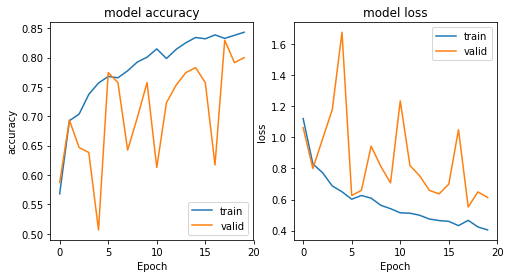

In [9]:
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("Epoch")
plt.legend(["train", "valid"], loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["train", "valid"], loc="upper right")
plt.show()

In [ ]:
from keras.models import load_model
model = load_model("checkpoints/cnn_dg_5c2d/weights_epoch_020_val_loss_1.31")

In [10]:
test_files_aussenansicht = os.listdir("clean3/test/Aussenansicht")
test_files_bad = os.listdir("clean3/test/Bad")
#test_files_bad = test_files_bad[0:2]
#test_files_bad
# test_files_divers = os.listdir("clean/Test/Divers")
test_files_grundriss = os.listdir("clean3/test/Grundriss")
test_files_innenansicht = os.listdir("clean3/test/Innenansicht")
test_files_kueche = os.listdir("clean3/test/Küche")

In [11]:
# no of test images
np.sum([73, 44, 21, 16, 83, 34])

271

In [12]:
from PIL import Image
from PIL import *
import PIL
import PIL.Image
from numpy import array

X_test = []

for i in test_files_aussenansicht:
    img=tf.keras.preprocessing.image.load_img("clean2/test/Aussenansicht/" + i, target_size=(img_width,img_height))
    img = tf.keras.preprocessing.image.img_to_array(img)/255
    X_test.append(img)

for i in test_files_bad:
    img = tf.keras.preprocessing.image.load_img("clean3/test/Bad/" + i, target_size=(img_width,img_height))
    img = tf.keras.preprocessing.image.img_to_array(img)/255
    X_test.append(img)

# for i in test_files_divers:
#     img = image.load_img("clean/Test/Divers/" + i, target_size=(img_width,img_height))
#     img = image.img_to_array(img)/255
#     X_test.append(img)
    
for i in test_files_grundriss:
    img = tf.keras.preprocessing.image.load_img("clean3/test/Grundriss/" + i, target_size=(img_width,img_height))
    img = tf.keras.preprocessing.image.img_to_array(img)/255
    X_test.append(img)
    
for i in test_files_innenansicht:
    img = tf.keras.preprocessing.image.load_img("clean3/test/Innenansicht/" + i, target_size=(img_width,img_height))
    img = tf.keras.preprocessing.image.img_to_array(img)/255
    X_test.append(img)
    
for i in test_files_kueche:
    img = tf.keras.preprocessing.image.load_img("clean3/test/Küche/" + i, target_size=(img_width,img_height))
    img = tf.keras.preprocessing.image.img_to_array(img)/255
    X_test.append(img)

X_test = np.asarray(X_test)
X_test.shape
#X_test[1]

(252, 150, 150, 3)

In [13]:
Y_test = []

for i in test_files_aussenansicht:
    Y_test.append(0)
    
for i in test_files_bad:
    Y_test.append(1)

# for i in test_files_divers:
#     Y_test.append(2)

for i in test_files_grundriss:
    Y_test.append(2)

for i in test_files_innenansicht:
    Y_test.append(3)

for i in test_files_kueche:
    Y_test.append(4)

Y_test = np.asarray(Y_test)
print(Y_test.shape)
Y_test[:]

(252,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [14]:
preds_test = model.predict(X_test)
preds_test[0:5]

array([[7.26862252e-01, 1.64280422e-02, 4.53353627e-04, 1.76702797e-01,
        7.95536116e-02],
       [9.66077209e-01, 9.16052726e-04, 1.33862323e-03, 3.02214324e-02,
        1.44668273e-03],
       [8.75373423e-01, 5.28417388e-03, 4.27921303e-04, 9.39102992e-02,
        2.50041801e-02],
       [5.21497279e-02, 1.63060166e-02, 1.24620525e-02, 7.97214687e-01,
        1.21867537e-01],
       [2.96772108e-03, 7.09664762e-01, 2.27478193e-03, 7.88047984e-02,
        2.06287891e-01]], dtype=float32)

In [15]:
predicted_classes=np.argmax(np.round(preds_test),axis=1)

In [16]:
Y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [17]:
Y_test[:] == np.argmax(preds_test,axis=1)

array([ True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True, False, False,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,

Model 5 Classes
Found 194 correct labels


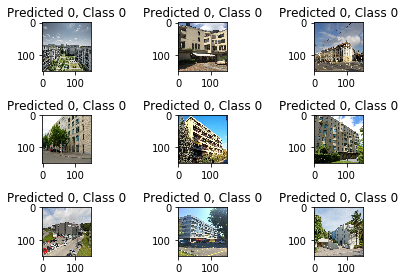

In [19]:
correct = np.where(predicted_classes==Y_test)[0]
print('Model 5 Classes')
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], Y_test[correct]))
    plt.tight_layout()

Model 5 Classes
Found 58 incorrect labels


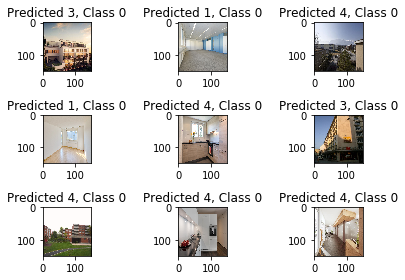

In [20]:
incorrect = np.where(predicted_classes!=Y_test)[0]
print('Model 5 Classes')
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], Y_test[incorrect]))
    plt.tight_layout()

In [21]:
##Classification Report

from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
# print(target_names)
print('Classification report - 5 Classes')
print(classification_report(Y_test, predicted_classes, target_names=target_names))

Classification report - 5 Classes
             precision    recall  f1-score   support

    Class 0       0.85      0.88      0.86        73
    Class 1       0.66      0.82      0.73        49
    Class 2       1.00      1.00      1.00        11
    Class 3       0.88      0.65      0.75        89
    Class 4       0.54      0.70      0.61        30

avg / total       0.79      0.77      0.77       252



In [22]:
print ('Model 5 Classes')
print(confusion_matrix(Y_test[:],np.argmax(preds_test,axis=1)))
print("Acc = " ,np.sum(Y_test[:]==np.argmax(preds_test,axis=1))/len(preds_test))

Model 5 Classes
[[61  2  1  3  6]
 [ 0 40  0  2  7]
 [ 0  0 11  0  0]
 [ 1 20  0 60  8]
 [ 1  2  0  5 22]]
Acc =  0.7698412698412699


In [23]:
sorted(os.listdir("clean3/test"))

['.DS_Store',
 '003a3ed6-3962-426e-a888-307e84fa6aa7.jpg',
 '006eaa95-ff9c-4585-b022-b7aa96a1a3f0.jpg',
 '00bfd75f-c895-4b40-a0e7-2f0ccdd0d961.jpg',
 '00c42b5c-727b-4c95-94c2-2faec0871078.jpg',
 '00ce326e-7898-45d2-b134-b72332bee52e.jpg',
 '00d09803-e199-4447-bc9e-ab9d1c9c87aa.jpg',
 '01b497c6-0741-4b3a-8afb-aa4320a728fc.jpg',
 '01b6a2f4-8a20-4f69-829b-18529cec8ed7.jpg',
 '01fb74f6-339d-4f9a-8b3c-c025d5e7d085.jpg',
 '01fdab61-3183-41bd-8fef-7b6b35837034.jpg',
 '02b34af1-d19f-4d23-b0ab-6d00551887a2.jpg',
 '02c08bcc-1c22-4d52-aead-36e681518bb9.jpg',
 '02cc9a2c-f076-40b5-95d5-e2e926bf52ce.jpg',
 '04b512c9-d52b-4fb7-9686-0199d0c71076.jpg',
 '04d5a4b0-1a32-4935-bbbe-dc289ea8025c.jpg',
 '04f5e167-a212-4f08-af66-258852be7ffd.jpg',
 '05ca107c-7707-44a4-a1cc-29a67d9334b9.jpg',
 '05d7db2c-c71f-4fa4-becd-34a2fc75bd60.jpg',
 '05f4f9b0-17e4-42c9-aec6-4073329500e3.jpg',
 '0a0eb257-8f68-4a64-a6f4-07b2b11674ce.jpg',
 '0a1209fe-15f5-4a8e-ae6c-6fcfc76cb68d.jpg',
 '0a41decd-63b5-4a67-8239-5b66f569606f.jp

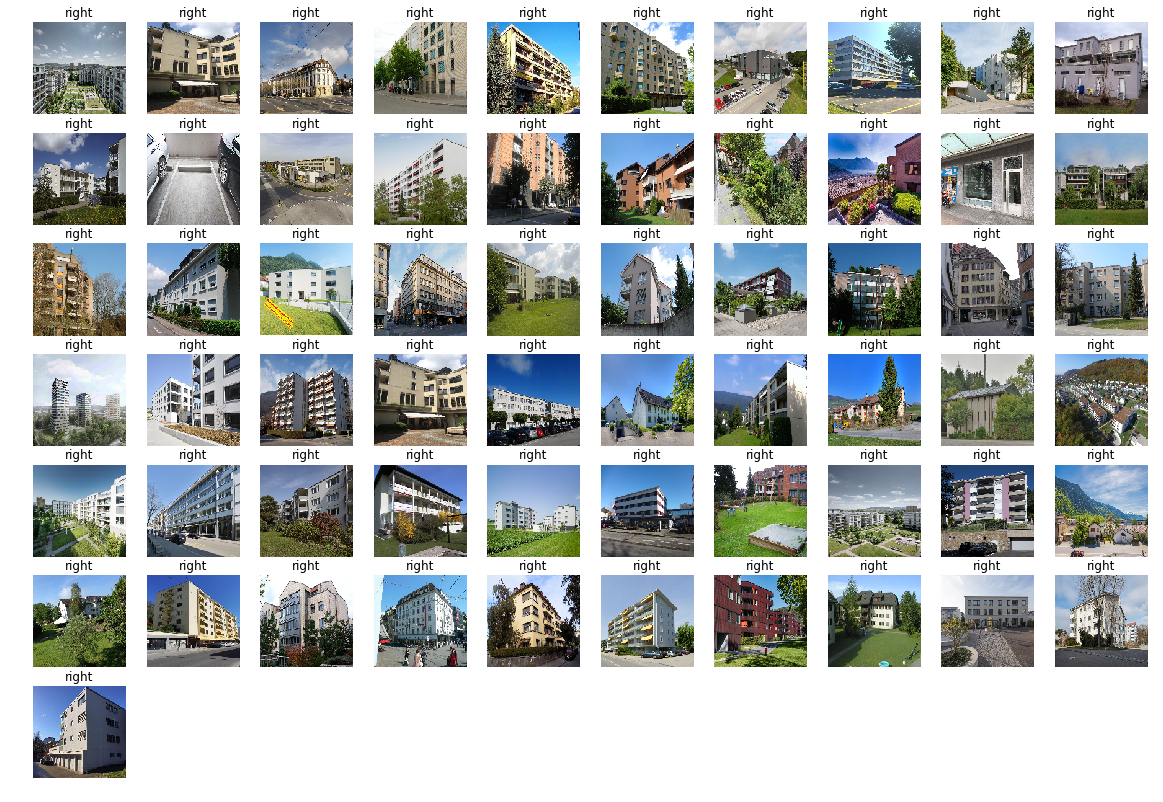

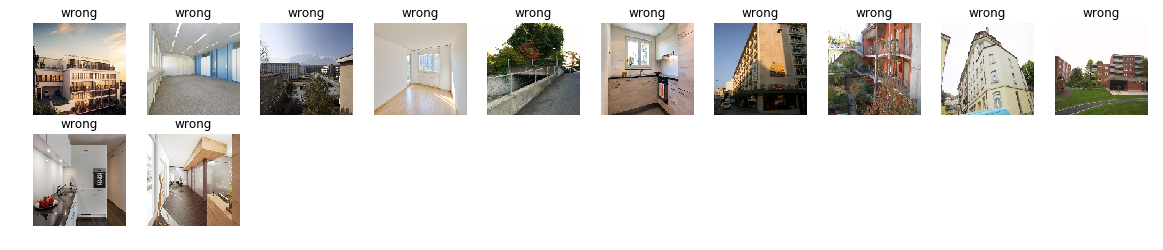

In [24]:
pred = np.argmax(preds_test,axis=1)

Klasse = 0 # Aussenansicht
#Klasse = 1 # Bad
#Klasse = 2 # Divers
#Klasse = 2 # Grundriss
#Klasse = 3 # Innenansicht
#Klasse = 4 # Küche

right = np.where(Y_test[:]==Klasse)[0][np.where(np.in1d(np.where(Y_test[:]==Klasse),np.where(pred[:]==Klasse)))]
wrong = np.where(Y_test[:]==Klasse)[0][(np.in1d(np.where(Y_test[:]==Klasse),np.where(pred[:]==Klasse)))==False]

plt.figure(figsize=(20,20))

for i in range(0,len(right)):
    plt.subplot(10,10,(i+1))
    plt.imshow(np.asarray(X_test[right[i]]))
    plt.axis('off')
    plt.title('right')
    
plt.figure(figsize=(20,20))

for i in range(0,len(wrong)):
    plt.subplot(10,10,(i+1))
    plt.imshow(np.asarray(X_test[wrong[i]]))
    plt.axis('off')
    plt.title('wrong')